#Plotly Express is a terse, consistent, high-level wrapper around Plotly.py for rapid data exploration and figure generation. ##This is the EDA of IRIS data to explore the wide range of plotly graphs available for doing analysis.


In [1]:
#!pip install plotly_express

In [2]:
import plotly_express as px
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [3]:
print(px.data.iris.__doc__)
iris = px.data.iris()


    Each row represents a flower.

    https://en.wikipedia.org/wiki/Iris_flower_data_set

    Returns:
        A `pandas.DataFrame` with 150 rows and the following columns: `['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_id']`.
    


In [4]:
tips = px.data.tips()
gapminder = px.data.gapminder()
election = px.data.election()
wind = px.data.wind()
carshare = px.data.carshare()

#This is perhaps the best known database to be found in the pattern recognition literature. 
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

##Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica



In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [7]:
iris.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
species_id      150 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [8]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,species_id
species,,,,,
setosa,5.006,3.418,1.464,0.244,1
versicolor,5.936,2.770,4.260,1.326,2
virginica,6.588,2.974,5.552,2.026,3


In [9]:
iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width,species_id
species,,,,,
setosa,50,50,50,50,50
versicolor,50,50,50,50,50
virginica,50,50,50,50,50


In [23]:
#Dummification of species

iris_data = pd.get_dummies(iris, columns=['species'], drop_first=True)

In [25]:
#Dropping columns 'sepecie_id' 
iris_data = iris_data.drop(['species_id'], axis = 1)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


#Drawing pair plot to know the joint relationship between 'Sepal Length' , 'Sepal Width' , 'Petal Length' & 'Petal Width'

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 1.0, 'Pair Plot')

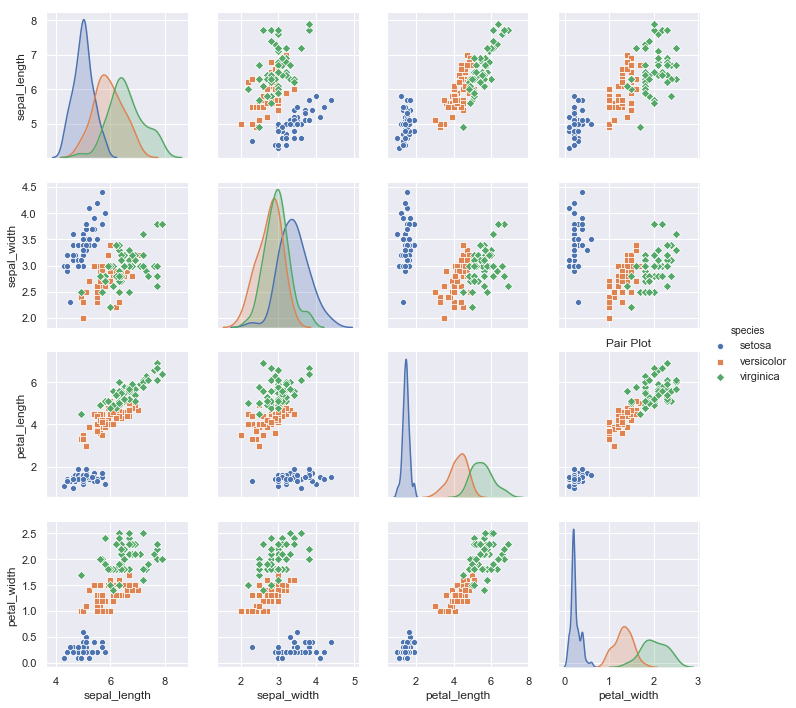

In [10]:
sns.pairplot(iris[["sepal_length","sepal_width","petal_length","petal_width","species"]],
             vars = ["sepal_length","sepal_width","petal_length","petal_width"],hue="species", 
             dropna=True,markers=["o", "s","D"])
plt.title('Pair Plot')

Observing the diagonal elements,

Clear distinction can be made between iris class using petal_width and petal_length alone.
There are overlaps seen using sepal_width and sepal_length, sepal_width and petal_width, sepal_width and petal_length


What are the features?

Sepal Length : Sepal lenght in cm
Sepal Width  : Sepal width in cm
Petal Length : Petal lenght in cm
Petal Width  : Petal width in cm

What is the response?

Species: Species id can be either 1, 2 or 3.
1-- Iris Setosa 
2-- Iris Versicolour 
3-- Iris Virginica

#Is there a relationship between species and sepal and petal width and length?

Text(0.5, 1.0, 'Correlation between features')

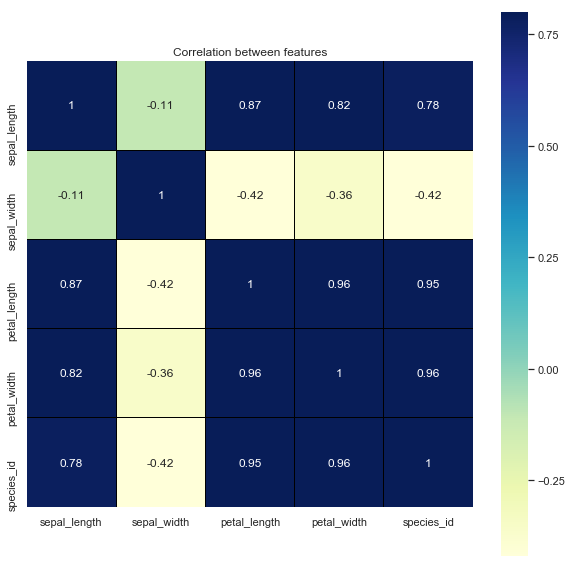

In [11]:
corr = iris.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

#Visualising Pairwise correlation

# Logistic Regression

Logistic regression is a techinque used for solving the classification problem.
And Classification is nothing but a problem of identifing to which of a set of categories a new observation belongs, on the basis of training dataset containing observations (or instances) whose categorical membership is known. 

## Preparing X and y using pandas

In [27]:
X = iris_data.loc[:,iris_data.columns != 'species_id']

X.head()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [36]:
y = iris_data.species_versicolor 
#iris_data[iris_data['species_versicolor']==1]
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    0
121    0
122    0
123    0
124    0
125    0
126    0
127    0
128    0
129    0
130    0
131    0
132    0
133    0
134    0
135    0
136    0
137    0
138    0
139    0
140    0
141    0
142    0
143    0
144    0
145    0
146    0
147    0
148    0
149    0
Name: species_versicolor, Length: 150, dtype: uint8

# Splitting X and y into training and test datasets.

In [37]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [38]:
print(X_train.shape)
print(y_train.shape)

(120, 6)
(120,)


In [39]:
print(X_test.shape)
print(y_test.shape)

(30, 6)
(30,)


# Logistic regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:

Load the algorithm
Instantiate and Fit the model to the training dataset
Prediction on the test set
Calculating the accuracy of the model

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
y_pred_train = logreg.predict(X_train)  

In [43]:
y_pred_test = logreg.predict(X_test)        # make predictions on the testing set

We need an evaluation metric in order to compare our predictions with the actual values.

#Model evaluation

Error is the deviation of the values predicted by the model with the true values.
We will use accuracy score __ and __confusion matrix for evaluation.

#Model Evaluation using accuracy classification score

In [44]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 1.0


#Model Evaluation using confusion matrix

A confusion matrix is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. 
Below is a diagram showing a general confusion matrix.

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0   1
0  17   0
1   0  13


In [46]:
confusion_matrix.index = ['Actual Versi','Actual NotVersi']
confusion_matrix.columns = ['Predicted Versi','Predicted NonVersi']
print(confusion_matrix)


                 Predicted Versi  Predicted NonVersi
Actual Versi                  17                   0
Actual NotVersi                0                  13


This means 17 + 13 = 30 correct predictions & 0 + 0 = 0 false predictions. Its rarest case where we get 100% correct predictions.

#Adjusting Threshold for predicting Died or Survived.

In the section 4.7 we have used, .predict method for classification. This method takes 0.5 as the default threshhod for prediction.
Now, we are going to see the impact of changing threshold on the accuracy of our logistic regression model. 
For this we are going to use .predict_proba method instead of using .predict method.

Setting the threshold to 0.75

In [47]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 1.0


The accuracy is still 1. Hence, 0.75 can be a good threshold for our model.

But lets also see the impact if threshold is set to 0.25

In [49]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 1.0


The accuracy has not changed.Since by either increasing or decreasing we dont see any impact on accuracy hence we can retain the threshold to <b>0.5<b> which was the original threshold.